# Machine learning - Assignment 7 - Support vector classifiers
____
**Author**: Kemal Cikota

**Course**: Machine learning
____

## Introduction

In this assignment, i will work with Support vector classifiers (SVMs). I will show how to learn and assess SVM classifiers and how to apply SVM on data and also give interpretations of how SVM can affect performance in models. This assignment is split in to two major parts, a conceptual and theoreticall part where i answer theory questions about SVM and the latter part of the assignment is a practical part where i actually implement and apply SVM.

## Conceptual Questions

**1. What is the intuition behind SVMs and how do they work?**

Support Vector Machines (SVM's) are machine learning algorithms that are applicable for both classification and regression. The main point with SVM is to find the optimal decision boundary that separates different classes in the dataset with the maximum margin. We can recall from past assignment that a decision boundary can be defined as a line or place that separates different classes in a classification problem and it is the exact region where the model makes a "decision". The margin is the space between the decision boundary and the closest data points from each class. In SVM we try to make this margin as big as possible in order to make the model more confident and generalizable.

In SVM, we essentially draw a line (or plane) that separates two classes while ensuring the widest gap between them (maximum margin).

This is a summary of how the algorithm works:

1. SVM will identify a hyperplane that separates classes with the largest possible margin. All of the points that lie on this boundary or closest are called support vectors because they span out the margin.
2. The algorithm will try to maximize this margin by trying to a hyperplane that has the biggest area between itself and its support vectors.
3. In most realistic cases, the data is not linearly separable, which means that we can not fit a line or hyperplane on a set of data. SVM does have ways of handling this by mapping data on a higher dimensional space where we may find a linear separator that can be defined as a straight line. There is also something called the "kernel trick" where we try to apply transformations like polynomial terms or penalty functions without computing the higher dimension coordinates.
4. Real world data can also often include noise and overlapping classes. SVM can also handle this by using "soft C margins" in order to balance the margin maximization and classification accuracy.

**2. Are SVMs always robust regarding overfitting and noisy data? Discuss your answer considering apects such as the choice of kernel and the degree of noise in the data.**

If we have a hard margin, which means that we need separate separation between classes, then noisy datapoints such as outliers or mislabeled points can have an undesired impact on the decision boundary which can lead to poor overfitting. In order to handle this, we have a "secondary margin", or "soft margin" where we add slack variables to the constraints that bound the decision area which makes the model more tolerant to noise as our decision bounds now becomes more "flexible". in most problems, we need to find a good balance in our slack that balances having a big margin while also minimizing misclassification and this is controlled by a "C variable". A lower C will give us a larger but more risk of misclassification and a bigger C will lead to less misclassification but more risk of overfitting.

Some datasets can not be separated by a straight line. And SVM can handle this by using "kernel functions" where SVMs default dot product between data points get replaced by a kernel function that computes the dot product in a separate transformed set instead of mapping a point from one space to another space with varrying dimensions. There are different kinds of kernels, like for example, linear, polynomial, Radial Basis Function (RBF) kernel and sigmoid kernels. Choosing the type of kernel for a dataset is important as it has a direct effect on overfitting and robustness. A linear kernel works well when the data is linearly separable, meaning we can just separate data with straight lines and works well when we have a lot of data and is less likely to overfit.

A polynomial kernel works well when we cant separate the data with straight lines so our decision bounds is instead makes us able to divide the data with a curve instead. However, if we have higher degree polynomials, it can overfit the model on noisy data so its important to decide a good degree.

A RBF kernel can handle non-linearity without requiring higher polynomials by calculating similarity between points using a similarity parameter that controls how much influence a singe point has. But it is important to choose a good parameter for this as well because a too high parameter will our decision boundary too flexible as too many outlying points will have an effect on normally valid points. While a too low of a parameter can lead to underfitting.

## Practical

For the practical part of the assignment, i will begin by generating data, then learn support vector classifiers from that data and then in the end use the Khan dataset in order to apply SVM.

### Generate data and get an overview of the data

We will begin by generating the observations belonging to the two classes.

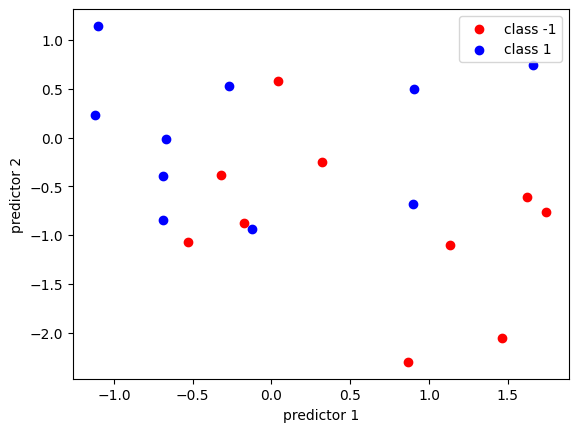

In [198]:
# Generate 20 normally distributed random numbers
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate list of 20 normally distributed random numbers
np.random.seed(1)

X = np.random.randn(20, 2)
y = np.concatenate([np.repeat(-1, 10), np.repeat(-1, 10)])
X[y == 1] = X[y == 1] + 1

y = np.array([-1]*10 + [1]*10)

plt.scatter(X[:10, 0], X[:10, 1], color='red', label='class -1')
plt.scatter(X[10:, 0], X[10:, 1], color='blue', label='class 1')

plt.xlabel('predictor 1')
plt.ylabel('predictor 2')
plt.legend()
plt.show()

By checking the graph visually, we can see that the classes are not linearly separable.

### Learn and assess a support vector (soft margine) classifier

We can fit the model to our data like many other models thanks to SKLearn. we also set the Cost to 10 and we use a linear kernel for this.

In [199]:
C = 10 # same as cost in R
svm_model = make_pipeline(SVC(kernel='linear', C=C))
svm_model.fit(X, y)

Pipeline(steps=[('svc', SVC(C=10, kernel='linear'))])

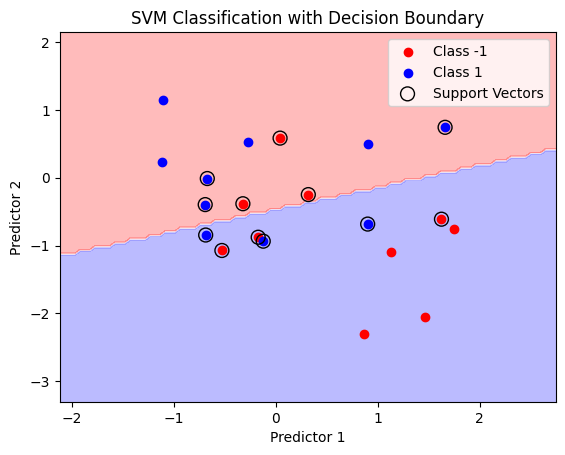

support vector indicies:  [ 0  1  4  6  8  9 12 13 15 16 17 19]


In [200]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)  # Decision boundary
plt.scatter(X[:10, 0], X[:10, 1], color='red', label='Class -1')
plt.scatter(X[10:, 0], X[10:, 1], color='blue', label='Class 1')

# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

print("support vector indicies: ", svm_model.named_steps['svc'].support_)


We now choose a lower "cost parameter", which is the C variable in my code. I will lower it to 0.1.

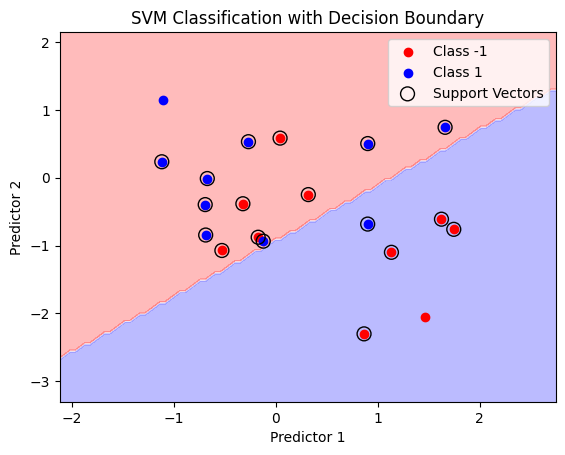

support vector indicies:  [ 0  1  2  3  4  6  7  8  9 11 12 13 14 15 16 17 18 19]


In [201]:
C = 0.1 # same as cost in R
svm_model = make_pipeline(SVC(kernel='linear', C=C))
svm_model.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)  # Decision boundary
plt.scatter(X[:10, 0], X[:10, 1], color='red', label='Class -1')
plt.scatter(X[10:, 0], X[10:, 1], color='blue', label='Class 1')

# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

print("support vector indicies: ", svm_model.named_steps['svc'].support_)

INTERPRETATION OF RESULTS